### Import modules# 

In [44]:
import csv
import pandas as pd
import datetime
import ipaddress
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

### Read in the csv and add headers to the columns

In [45]:
df = pd.read_csv('../data/new_data1.csv',
                 names = ['IP_Address', 'Subnet_mask', 'In_use?', 'unix_timestamp'])

### Combine IP_Address and Subnet_mask columns to create IP_Network column

In [46]:
df['IP_Network'] = df['IP_Address'] + '/' + df['Subnet_mask'].map(str)
df

,IP_Address,Subnet_mask,In_use?,unix_timestamp,IP_Network
0,172.31.32.0,20,1,1528336673,172.31.32.0/20
1,172.31.16.0,20,1,1528336673,172.31.16.0/20
2,10.128.16.0,22,1,1528336673,10.128.16.0/22
3,10.128.4.0,22,1,1528336673,10.128.4.0/22
4,10.128.0.0,22,1,1528336673,10.128.0.0/22
5,10.128.131.0,24,1,1528336673,10.128.131.0/24
6,10.128.132.0,22,1,1528336673,10.128.132.0/22
7,10.128.129.0,24,1,1528336673,10.128.129.0/24
8,10.128.130.0,24,1,1528336673,10.128.130.0/24
9,10.128.128.0,24,1,1528336673,10.128.128.0/24


### Convert IP_Address column to ipaddress.ip_address object and IP_Network column to ipaddress.ip_network object

In [47]:
df['IP_Address'] = df['IP_Address'].apply(ipaddress.ip_address)
df['IP_Network'] = df['IP_Network'].apply(ipaddress.ip_network)

In [48]:
df

,IP_Address,Subnet_mask,In_use?,unix_timestamp,IP_Network
0,172.31.32.0,20,1,1528336673,172.31.32.0/20
1,172.31.16.0,20,1,1528336673,172.31.16.0/20
2,10.128.16.0,22,1,1528336673,10.128.16.0/22
3,10.128.4.0,22,1,1528336673,10.128.4.0/22
4,10.128.0.0,22,1,1528336673,10.128.0.0/22
5,10.128.131.0,24,1,1528336673,10.128.131.0/24
6,10.128.132.0,22,1,1528336673,10.128.132.0/22
7,10.128.129.0,24,1,1528336673,10.128.129.0/24
8,10.128.130.0,24,1,1528336673,10.128.130.0/24
9,10.128.128.0,24,1,1528336673,10.128.128.0/24


### Create dictionary for ratio of 24 to 22 subnet masks

In [49]:
dic = {22:4, 24:1, 20:16}

# Add new column to hold ratio values

In [50]:
df['mask_conversion'] = df['Subnet_mask'].map(dic)

### Display new dataframe to verify new column addition

In [51]:
df

,IP_Address,Subnet_mask,In_use?,unix_timestamp,IP_Network,mask_conversion
0,172.31.32.0,20,1,1528336673,172.31.32.0/20,16
1,172.31.16.0,20,1,1528336673,172.31.16.0/20,16
2,10.128.16.0,22,1,1528336673,10.128.16.0/22,4
3,10.128.4.0,22,1,1528336673,10.128.4.0/22,4
4,10.128.0.0,22,1,1528336673,10.128.0.0/22,4
5,10.128.131.0,24,1,1528336673,10.128.131.0/24,1
6,10.128.132.0,22,1,1528336673,10.128.132.0/22,4
7,10.128.129.0,24,1,1528336673,10.128.129.0/24,1
8,10.128.130.0,24,1,1528336673,10.128.130.0/24,1
9,10.128.128.0,24,1,1528336673,10.128.128.0/24,1


### Create new column for number of addresses per subnet

In [52]:
df['num_addresses'] = (df['mask_conversion']*256)
df

,IP_Address,Subnet_mask,In_use?,unix_timestamp,IP_Network,mask_conversion,num_addresses
0,172.31.32.0,20,1,1528336673,172.31.32.0/20,16,4096
1,172.31.16.0,20,1,1528336673,172.31.16.0/20,16,4096
2,10.128.16.0,22,1,1528336673,10.128.16.0/22,4,1024
3,10.128.4.0,22,1,1528336673,10.128.4.0/22,4,1024
4,10.128.0.0,22,1,1528336673,10.128.0.0/22,4,1024
5,10.128.131.0,24,1,1528336673,10.128.131.0/24,1,256
6,10.128.132.0,22,1,1528336673,10.128.132.0/22,4,1024
7,10.128.129.0,24,1,1528336673,10.128.129.0/24,1,256
8,10.128.130.0,24,1,1528336673,10.128.130.0/24,1,256
9,10.128.128.0,24,1,1528336673,10.128.128.0/24,1,256


### Summing num_addresses column to get count of total IP addresses

In [53]:
#IP_count = df['num_addresses'].sum()
count_24s = df['mask_conversion'].sum()
#print("Number of IP Addresses:", IP_count)
print("number of /24s:", count_24s)

number of /24s: 760


### total addresses = number of addresses in a /16 network
### Caluculated percent of a /16 network

In [54]:
#total_addresses = 65534
total_24s_per_16 = 256
#pct_used = (IP_count/total_addresses)*100
pct_16_used = (count_24s/total_24s_per_16)*100
#print("percent used:", pct_used)
print("percent used:", pct_16_used)

percent used: 296.875


### Pie chart of /24 usage per /16 network

Text(0.5,1,'Percentage of /16 network utilized')

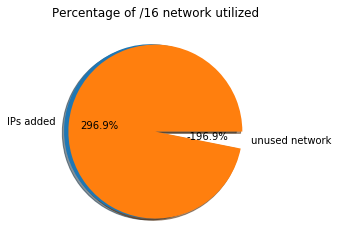

In [55]:
labels = 'IPs added', 'unused network'
fracs = [count_24s, (total_24s_per_16 - count_24s)]
explode = (0.05, 0)
grid = GridSpec(1,1)
plt.subplot(grid[0,0], aspect=1)
plt.pie(fracs, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title("Percentage of /16 network utilized")
#plt.savefig("test_figures/IP_pct_pie", dpi=100)

### Convert unix_timestamp to datetime and display new dataframe

In [56]:
df['date'] = pd.to_datetime(df['unix_timestamp'], unit='s')
df

,IP_Address,Subnet_mask,In_use?,unix_timestamp,IP_Network,mask_conversion,num_addresses,date
0,172.31.32.0,20,1,1528336673,172.31.32.0/20,16,4096,2018-06-07 01:57:53
1,172.31.16.0,20,1,1528336673,172.31.16.0/20,16,4096,2018-06-07 01:57:53
2,10.128.16.0,22,1,1528336673,10.128.16.0/22,4,1024,2018-06-07 01:57:53
3,10.128.4.0,22,1,1528336673,10.128.4.0/22,4,1024,2018-06-07 01:57:53
4,10.128.0.0,22,1,1528336673,10.128.0.0/22,4,1024,2018-06-07 01:57:53
5,10.128.131.0,24,1,1528336673,10.128.131.0/24,1,256,2018-06-07 01:57:53
6,10.128.132.0,22,1,1528336673,10.128.132.0/22,4,1024,2018-06-07 01:57:53
7,10.128.129.0,24,1,1528336673,10.128.129.0/24,1,256,2018-06-07 01:57:53
8,10.128.130.0,24,1,1528336673,10.128.130.0/24,1,256,2018-06-07 01:57:53
9,10.128.128.0,24,1,1528336673,10.128.128.0/24,1,256,2018-06-07 01:57:53


In [57]:
new_df = df[['date', 'IP_Network', 'mask_conversion']]
new_df = new_df.groupby(['date', 'IP_Network']).sum()

In [58]:
new_df

mask_conversion
date                IP_Network                      
2018-06-07 01:57:53 10.128.0.0/22                  4
                    10.128.4.0/22                  4
                    10.128.8.0/22                  4
                    10.128.12.0/22                 4
                    10.128.16.0/22                 4
                    10.128.128.0/24                1
                    10.128.129.0/24                1
                    10.128.130.0/24                1
                    10.128.131.0/24                1
                    10.128.132.0/22                4
                    172.31.0.0/20                 16
                    172.31.16.0/20                16
                    172.31.32.0/20                16
2018-06-07 01:59:39 10.128.0.0/22                  4
                    10.128.4.0/22                  4
                    10.128.8.0/22                  4
                    10.128.12.0/22                 4
                    10.128.16.0/22                 4
                    10.128.128.0/24                1
                    10.128.129.0/24                1
                    10.128.130.0/24                1
                    10.128.131.0/24                1
                    10.128.132.0/22                4
                    172.31.0.0/20                 16
                    172.31.16.0/20                16
                    172.31.32.0/20                16
2018-06-07 02:00:19 10.128.0.0/22                  4
                    10.128.4.0/22                  4
                    10.128.8.0/22                  4
                    10.128.12.0/22                 4
...                                              ...
2018-06-07 02:01:54 10.128.132.0/22                4
                    172.31.0.0/20                 16
                    172.31.16.0/20                16
                    172.31.32.0/20                16
2018-06-07 02:02:00 10.128.0.0/22                  4
                    10.128.4.0/22                  4
                    10.128.8.0/22                  4
                    10.128.12.0/22                 4
                    10.128.16.0/22                 4
                    10.128.128.0/24                1
                    10.128.129.0/24                1
                    10.128.130.0/24                1
                    10.128.131.0/24                1
                    10.128.132.0/22                4
                    172.31.0.0/20                 16
                    172.31.16.0/20                16
                    172.31.32.0/20                16
2018-06-07 02:06:10 10.128.0.0/22                  4
                    10.128.4.0/22                  4
                    10.128.8.0/22                  4
                    10.128.12.0/22                 4
                    10.128.16.0/22                 4
                    10.128.128.0/24                1
                    10.128.129.0/24                1
                    10.128.130.0/24                1
                    10.128.131.0/24                1
                    10.128.132.0/22                4
                    172.31.0.0/20                 16
                    172.31.16.0/20                16
                    172.31.32.0/20                16

[130 rows x 1 columns]

### Creating new dataframe for analyzing ip address additions over time

In [65]:
#ip_per_10sec = df[['date', 'num_addresses']]
current_ips = df[['date', 'mask_conversion']]

### Setting index to date

In [66]:
current_ips = current_ips.set_index(['date'])
current_ips
#df['minute'] = df['date'].apply()

,mask_conversion
date,
2018-06-07 01:57:53,16
2018-06-07 01:57:53,16
2018-06-07 01:57:53,4
2018-06-07 01:57:53,4
2018-06-07 01:57:53,4
2018-06-07 01:57:53,1
2018-06-07 01:57:53,4
2018-06-07 01:57:53,1
2018-06-07 01:57:53,1


### Grouping by Date and summing the number of addresses per date group

In [67]:
#ip_per_10sec.index = ip_per_10sec.index.map(lambda x: x.replace(second=0))
current_ips = current_ips.groupby(['date']).sum()

### Number of IP addresses created every 10 seconds

In [68]:
current_ips

,mask_conversion
date,
2018-06-07 01:57:53,76
2018-06-07 01:59:39,76
2018-06-07 02:00:19,76
2018-06-07 02:00:24,76
2018-06-07 02:00:30,76
2018-06-07 02:00:37,76
2018-06-07 02:01:49,76
2018-06-07 02:01:54,76
2018-06-07 02:02:00,76


### Plot of number of IP addresses added to network at each point in time

In [69]:
current_ips.dtypes

mask_conversion    int64
dtype: object

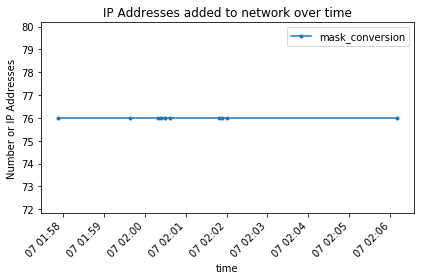

In [70]:
#%matplotlib inline
#x = ip_per_10sec.index
#y = ip_per_10sec['mask_conversion']
#plt.bar(x, y)
#ax = plt.subplot(111)
#ax.bar(ip_per_10sec.index, ip_per_10sec['mask_conversion'], width=10)
#ax.xaxis_date()
#ip_ts = ip_per_10sec.resample('W', how= 'max')
current_ips.plot(style='.-', rot=45, ax=None)
plt.ylabel("Number or IP Addresses")
plt.xlabel("time")
plt.title("IP Addresses added to network over time")
plt.tight_layout()
#plt.savefig("figures_test/IP_Addition", dpi=100)
plt.savefig("./startflask/static/images/IP_Addition", dpi=100)
self.logger.info("wrote file IP_Additon")

In [72]:
#total_addresses = 65534
total_24s_per_16 = 256
count_24s = current_ips['mask_conversion'][-1]
#pct_used = (IP_count/total_addresses)*100
pct_16_used = (count_24s/total_24s_per_16)*100
#print("percent used:", pct_used)
print("percent used:", pct_16_used)

percent used: 29.6875


Text(0.5,1,'Percentage of /16 network utilized')

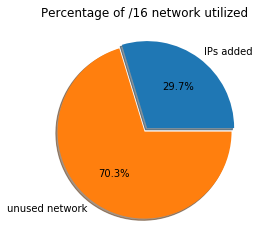

In [73]:
labels = 'IPs added', 'unused network'
fracs = [count_24s, (total_24s_per_16 - count_24s)]
explode = (0.05, 0)
grid = GridSpec(1,1)
plt.subplot(grid[0,0], aspect=1)
plt.pie(fracs, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title("Percentage of /16 network utilized")
#plt.savefig("test_figures/IP_pct_pie", dpi=100)

### Adding column to hold cumulative summation of  IP addresses over time

In [32]:
#for i, row in ip_per_10sec.iterrows():
#  ifor_val = something
#  if <condition>:
#    ifor_val = something_else
#  df.set_value(i,'ifor',ifor_val)


#for i in ip_per_10sec.index:
#    if <something>:
#        df.at[i, 'ifor'] = x
#    else:
#        df.at[i, 'ifor'] = y

#ip_per_10sec['ip_cum'] = ip_per_10sec['num_addresses'].cumsum()
ip_per_10sec['ip_cumul'] = ip_per_10sec['mask_conversion'].cumsum()
ip_per_10sec

,mask_conversion,ip_cumul
date,,
2018-05-07 05:16:22,4,4
2018-05-07 05:16:32,4,8
2018-05-07 05:16:42,4,12
2018-05-07 05:16:52,4,16
2018-05-07 05:17:02,12,28
2018-06-07 01:57:53,76,104
2018-06-07 01:59:39,76,180
2018-06-07 02:00:19,76,256
2018-06-07 02:00:24,76,332


### Unnecessarily creating new dataframe to plot accumulation of ip addresses on network over time

In [33]:
ip = ip_per_10sec.reset_index()
ips_over_time = ip[['date', 'ip_cumul']]

In [34]:
ips_over_time = ips_over_time.set_index(['date'])

In [35]:
ips_over_time

,ip_cumul
date,
2018-05-07 05:16:22,4
2018-05-07 05:16:32,8
2018-05-07 05:16:42,12
2018-05-07 05:16:52,16
2018-05-07 05:17:02,28
2018-06-07 01:57:53,104
2018-06-07 01:59:39,180
2018-06-07 02:00:19,256
2018-06-07 02:00:24,332


### Plot of accumulation of IP adddresses on network over time

Text(0.5,1,'Accumulation of IP Addresses on network over time')

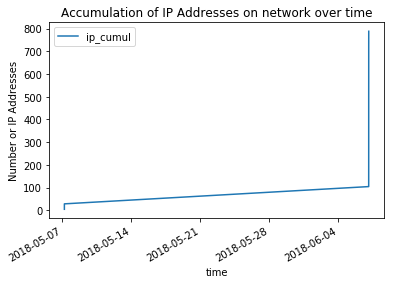

In [36]:
ips_over_time.plot(kind='line')
plt.ylabel("Number or IP Addresses")
plt.xlabel("time")
plt.title("Accumulation of IP Addresses on network over time")
#plt.savefig("test_figures/IP_Accumulation", dpi=100)